In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes (tables) that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table - variables Measurement and Station.
# Assuming you have already executed the necessary code to reflect tables and create the Base object

# Save references to the measurement and station tables
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.  Session query to display info for 
# all active session. Scalar method is used to return the first column of the first row
# so should provide most recent date.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23


In [10]:
# Calculate the date one year from the last date in data set.
prior_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(prior_year)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores.
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prior_year).order_by(Measurement.date).all()

precip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names.
# Set index to date column.
prcp_df = pd.DataFrame(precip, columns=["Date", "Precipitation"])
prcp_df = prcp_df.set_index("Date")
print(prcp_df)

            Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
...                   ...
2017-08-22           0.50
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]


In [13]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by="Date")
print(prcp_df)

            Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
...                   ...
2017-08-22           0.50
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.45

[2230 rows x 1 columns]


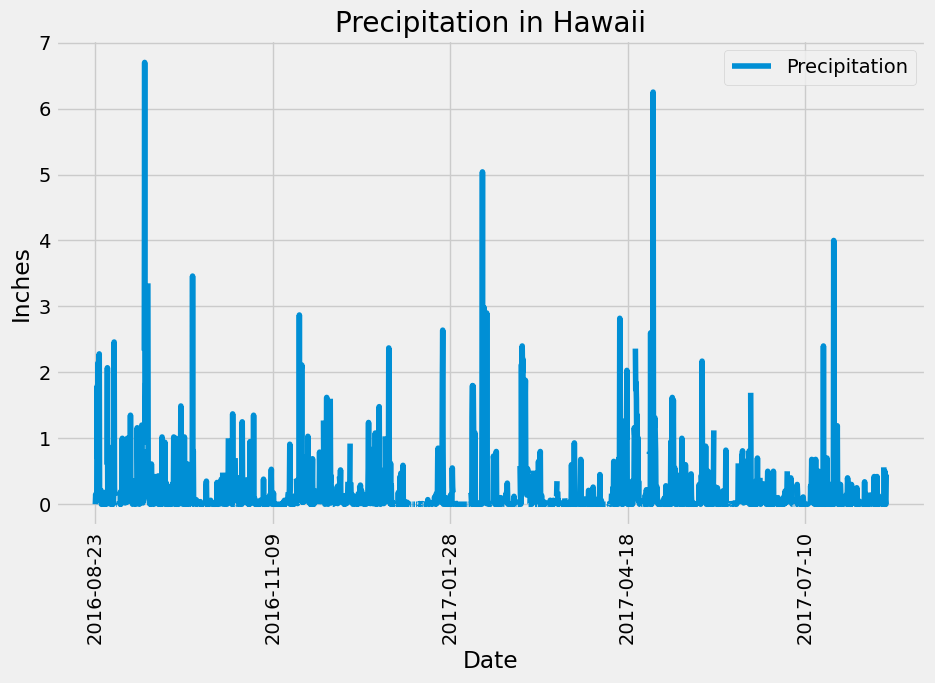

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data.
prcp_df.plot(y="Precipitation", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in Hawaii")
plt.xticks(rotation=90)
plt.show()


In [15]:
summary_stat = prcp_df.describe()
print(summary_stat)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_df["Precipitation"].describe()
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(func.count(Station.station)).all()
print(station_total)

[(9,)]


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(query_results)


[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram.
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prior_year).all()

# Extract the temperature values from the result
temp_values = [temp[0] for temp in temperature_data]

temp_values


NameError: name 'temperature_data' is not defined

In [ ]:
# Plot the results as a histogram
plt.hist(temp_values, bins=12)
plt.legend(["tobs"], loc = "upper right")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observation Data - Station USC00519281")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()